Baseline for predicting TTF (Autoregressive seasonal methods)

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the data

data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'TTF':data['TTF'].ravel()})  
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel(), 'T_der':data['T_der'].ravel(), 'Vel_der':data['Vel_der'].ravel()})
                   # 'T_off':data['T_off'].ravel(), 'Vel_off':data['Vel_off'].ravel()})    # 8 features

df = a_t.merge(m_t, on='Time')

ydf = df['TTF']
print(ydf.shape)


(132399,)


In [3]:
# Shift with a period p (approx. size of the cycle)

p = 400
df2 = pd.concat([ydf.shift(p), ydf], axis=1)
df2.columns = ['TTF(t-p)', 'TTF(t)']
print(df2.tail(5))


        TTF(t-p)  TTF(t)
132394      3.42     0.0
132395      3.41     0.0
132396      3.40     0.0
132397      3.39     0.0
132398      3.38     0.0


In [4]:
# Split into train-test

x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,0], df2.iloc[:,1], test_size=0.3, shuffle=False)
  
# Predict every next cycle same as its previous one 
y_pred_1 = x_test
test_rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))
test_r2_1 = r2_score(y_test, y_pred_1)

# Predict all test cycles same as the last observed cycle of training data
y_pred_2 = np.resize(x_test[:380], len(y_test))
test_rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
test_r2_2 = r2_score(y_test, y_pred_2)

print("\nSEASONAL PERSISTANCE METHOD: \nRMSE: ", test_rmse_1, "\nR2 score: ", test_r2_1)
print("\nNAIVE FORECAST METHOD: \nRMSE: ", test_rmse_2, "\nR2 score: ", test_r2_2)



SEASONAL PERSISTANCE METHOD: 
RMSE:  1.315498104106721 
R2 score:  -0.312192181956797

NAIVE FORECAST METHOD: 
RMSE:  1.4500760927671543 
R2 score:  -0.5944047434712483


Text(0.5, 1.0, 'Detailed View, Test data')

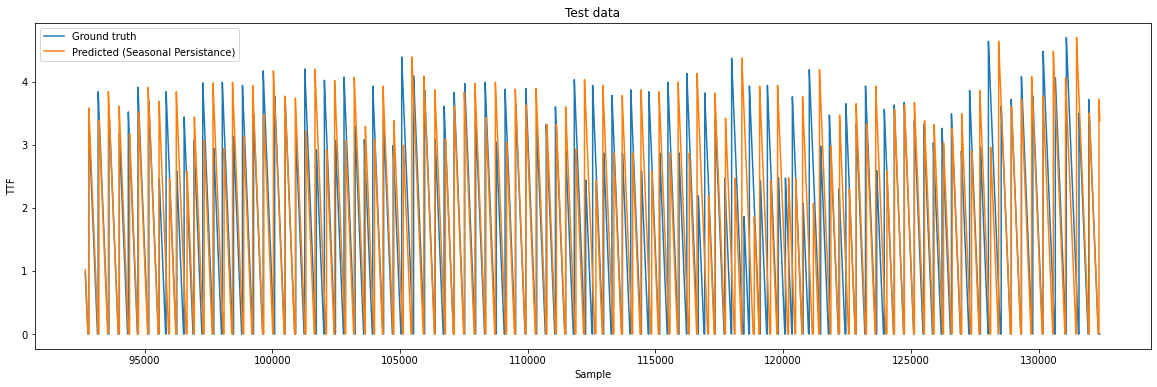

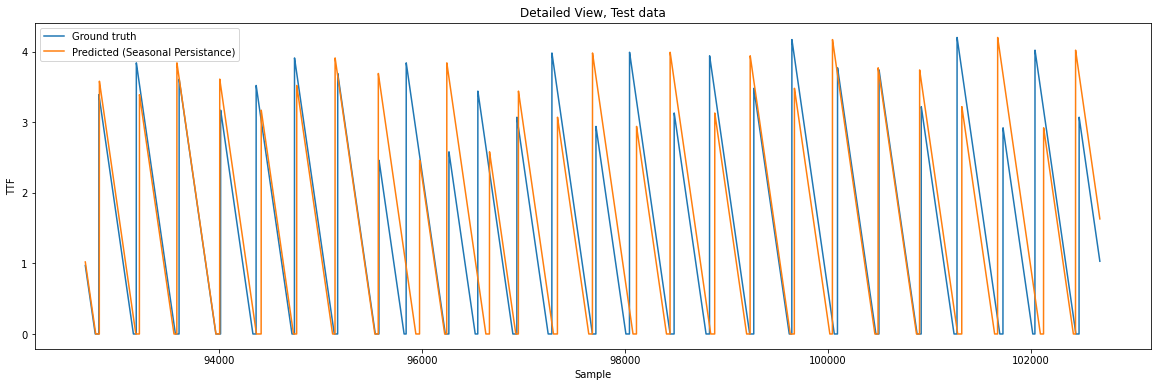

In [5]:
## Seasonal persistence

  # Results plot
fig = plt.figure(1, figsize=(20,6))
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred_1)
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend([ 'Ground truth', 'Predicted (Seasonal Persistance)'])
plt.title('Test data')

  # Detail view plot
n = 10000
fig = plt.figure(2, figsize=(20,6))
plt.plot(y_test.index[:n], y_test[:n])
plt.plot(y_test.index[:n], y_pred_1[:n])
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend([ 'Ground truth', 'Predicted (Seasonal Persistance)'])
plt.title('Detailed View, Test data')


Text(0.5, 1.0, 'Detailed View, Test data')

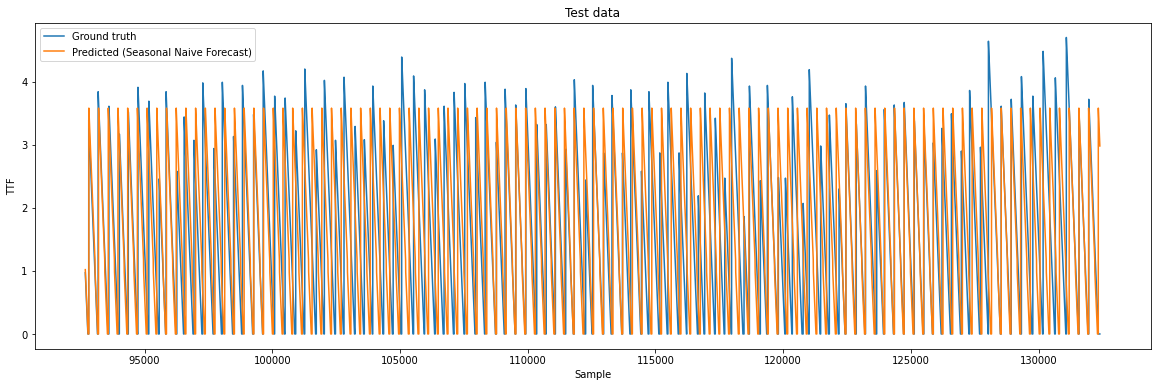

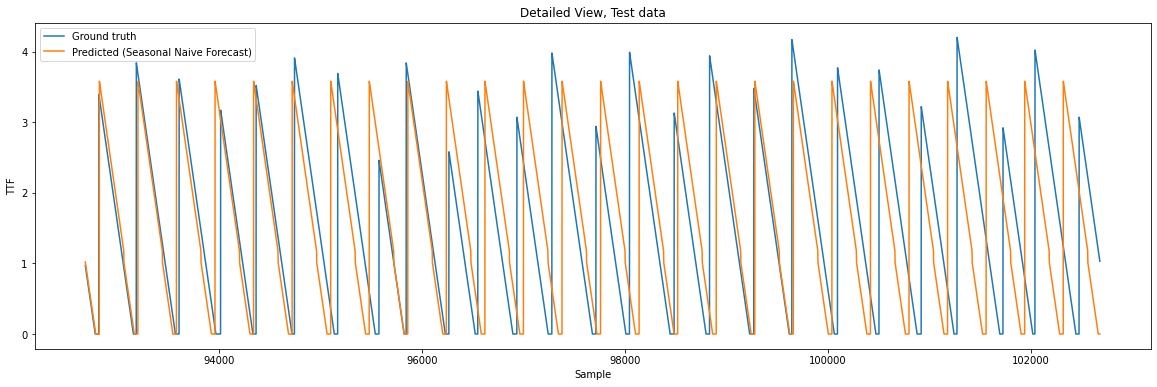

In [6]:
## Seasonal Naive forecast

  # Results plot
fig = plt.figure(3, figsize=(20,6))
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred_2)
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend([ 'Ground truth', 'Predicted (Seasonal Naive Forecast)'])
plt.title('Test data')

  # Detail view plot
n = 10000
fig = plt.figure(4, figsize=(20,6))
#plt.plot(train_y)
plt.plot(y_test.index[:n], y_test[:n])
plt.plot(y_test.index[:n], y_pred_2[:n])
plt.xlabel('Sample')
plt.ylabel('TTF')
plt.legend([ 'Ground truth', 'Predicted (Seasonal Naive Forecast)'])
plt.title('Detailed View, Test data')
